In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from unidecode import unidecode
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
fotocasa = pd.read_csv("fotocasa_cleaned.csv")

In [3]:
fotocasa.head()

,Air_Conditioner,Antiquity,Bathrooms,Borough,Community_Zone,Concierge,District,Elevator,Emissions,Energy_Consumption,...,Furnished,Garden,Len_Extras,Photos,Price,Rooms,Size,Swimming_Pool,Terrace,Type
0,0,70-100,1,Gaztambide,0,0,Chamberí,1,G,G,...,1,0,4,6,750,2,51,0,0,Piso
1,1,5-10,2,Justicia,0,1,Centro,1,B,C,...,0,0,18,30,1700,2,157,0,0,Piso
2,1,30-50,2,San Juan Bautista,1,1,Ciudad Lineal,1,G,G,...,1,0,18,66,1900,3,158,1,1,Piso
3,1,50-70,1,Guindalera,0,0,Salamanca,1,C,D,...,0,0,5,28,1551,1,59,0,0,Ático
4,0,50-70,3,Estrella,0,1,Retiro,1,E,E,...,0,0,8,36,1400,4,132,0,1,Piso


In [4]:
fotocasa.describe()

,Air_Conditioner,Bathrooms,Community_Zone,Concierge,Elevator,Ensuite,Equipped_Kitchen,Furnished,Garden,Len_Extras,Photos,Price,Rooms,Size,Swimming_Pool,Terrace
count,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000
mean,0.629634,1.489401,0.166975,0.325253,0.728123,0.174367,0.861289,0.459615,0.055006,7.932493,20.749647,1421.755843,2.030764,86.410262,0.149908,0.229264
std,0.482929,0.840945,0.372974,0.468495,0.444951,0.379445,0.345663,0.498393,0.228004,4.652610,11.384351,5548.404629,1.106441,71.182968,0.357000,0.420382
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,160.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,13.000000,780.000000,1.000000,50.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,7.000000,19.000000,990.000000,2.000000,70.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,11.000000,26.000000,1428.500000,3.000000,100.000000,0.000000,0.000000
max,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000,110.000000,420000.000000,23.000000,2190.000000,1.000000,1.000000


In [5]:
fotocasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Air_Conditioner     9199 non-null   int64 
 1   Antiquity           9199 non-null   object
 2   Bathrooms           9199 non-null   int64 
 3   Borough             9199 non-null   object
 4   Community_Zone      9199 non-null   int64 
 5   Concierge           9199 non-null   int64 
 6   District            9199 non-null   object
 7   Elevator            9199 non-null   int64 
 8   Emissions           9199 non-null   object
 9   Energy_Consumption  9199 non-null   object
 10  Ensuite             9199 non-null   int64 
 11  Equipped_Kitchen    9199 non-null   int64 
 12  Floor               9199 non-null   object
 13  Furnished           9199 non-null   int64 
 14  Garden              9199 non-null   int64 
 15  Len_Extras          9199 non-null   int64 
 16  Photos              9199

In [6]:
num_cols = ["Air_Conditioner", "Bathrooms", "Community_Zone", "Concierge", "Elevator",
                  "Ensuite", "Equipped_Kitchen", "Furnished", "Garden", "Len_Extras", "Photos",
                  "Rooms", "Size", "Swimming_Pool", "Terrace", "Price"]
cat_cols = ["Antiquity", "Borough", "District", "Emissions", "Energy_Consumption","Floor","Type"]

(5.0, 8.9)

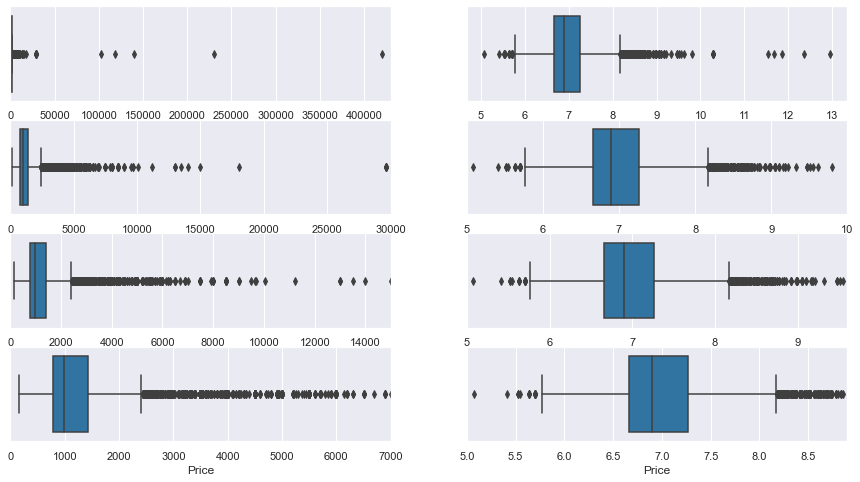

In [7]:
f, ax = plt.subplots(nrows = 4, ncols=2, figsize = (15,8))
sns.boxplot(fotocasa["Price"], ax = ax[0][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[0][1])
ax[0][0].set_xlim([0,430000])
sns.boxplot(fotocasa["Price"], ax = ax[1][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[1][1])
ax[1][0].set_xlim([0,30000])
ax[1][1].set_xlim([5,10])
sns.boxplot(fotocasa["Price"], ax = ax[2][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[2][1])
ax[2][0].set_xlim([0,15000])
ax[2][1].set_xlim([5,9.6])
sns.boxplot(fotocasa["Price"], ax = ax[3][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[3][1])
ax[3][0].set_xlim([0,7000])
ax[3][1].set_xlim([5,8.9])

In [8]:
outliers = (np.log(fotocasa["Price"])>9) | (np.log(fotocasa["Price"])<5.5)
print("There are ", outliers.sum(), "outliers, ", outliers.sum()/len(fotocasa)*100, "% of the data")
min_ = fotocasa.loc[~outliers, "Price"].min()
max_ = fotocasa.loc[~outliers, "Price"].max()
print("Price values from ", min_, " to ", max_, "€")

There are  32 outliers,  0.3478638982498098 % of the data
Price values from  250  to  8000 €


In [9]:
def isoutlier(data):
    (q1, q3)=data.quantile([0.25,0.75])
    iqr = q3 - q1
    maxwhis = q3 + 1.5 * iqr
    minwhis = q1 - 1.5 * iqr
    return (data>=maxwhis) | (data<=minwhis)

In [10]:
outliers1 = isoutlier(fotocasa["Price"])
print("There are ", outliers1.sum(), "outliers, ", outliers1.sum()/len(fotocasa)*100, "% of the data")
min1 = fotocasa.loc[~outliers1, "Price"].min()
max1 = fotocasa.loc[~outliers1, "Price"].max()
print("Price values from ", min1, " to ", max1, "€")

There are  779 outliers,  8.468311773018806 % of the data
Price values from  160  to  2400 €


In [11]:
outliers2 = isoutlier(np.log(fotocasa["Price"]))
print("There are ", outliers2.sum(), "outliers, ", outliers2.sum()/len(fotocasa)*100, "% of the data")
min2 = fotocasa.loc[~outliers2, "Price"].min()
max2 = fotocasa.loc[~outliers2, "Price"].max()
print("Price values from ", min2, " to ", max2, "€")

There are  303 outliers,  3.293836286552886 % of the data
Price values from  320  to  3536 €


In [12]:
outliers3 = isoutlier(np.sqrt(fotocasa["Price"]))
print("There are ", outliers3.sum(), "outliers, ", outliers3.sum()/len(fotocasa)*100, "% of the data")
min3 = fotocasa.loc[~outliers3, "Price"].min()
max3 = fotocasa.loc[~outliers3, "Price"].max()
print("Price values from ", min3, " to ", max3, "€")

There are  588 outliers,  6.391999130340255 % of the data
Price values from  225  to  2750 €


The aim is to help a wide range of people, very expensive rents are unusual. That is why the criteria will be: 

$5.5 < \ln({Price}) < 9$

In [13]:
fotocasa_eda = fotocasa[~outliers]

In [14]:
fotocasa_eda.columns

Index(['Air_Conditioner', 'Antiquity', 'Bathrooms', 'Borough',
       'Community_Zone', 'Concierge', 'District', 'Elevator', 'Emissions',
       'Energy_Consumption', 'Ensuite', 'Equipped_Kitchen', 'Floor',
       'Furnished', 'Garden', 'Len_Extras', 'Photos', 'Price', 'Rooms', 'Size',
       'Swimming_Pool', 'Terrace', 'Type'],
      dtype='object')

# Price

Text(0.5, 1.0, 'log Price distribution')

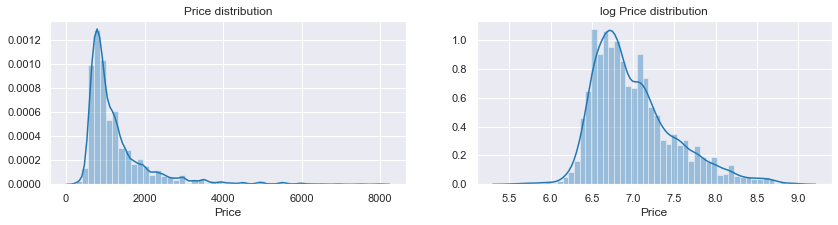

In [15]:
f, ax = plt.subplots(ncols = 2, figsize = (14,3))
sns.distplot(fotocasa_eda["Price"], ax = ax[0])
ax[0].set_title("Price distribution")
sns.distplot(np.log(fotocasa_eda["Price"]), ax = ax[1])
ax[1].set_title("log Price distribution")

# Correlation

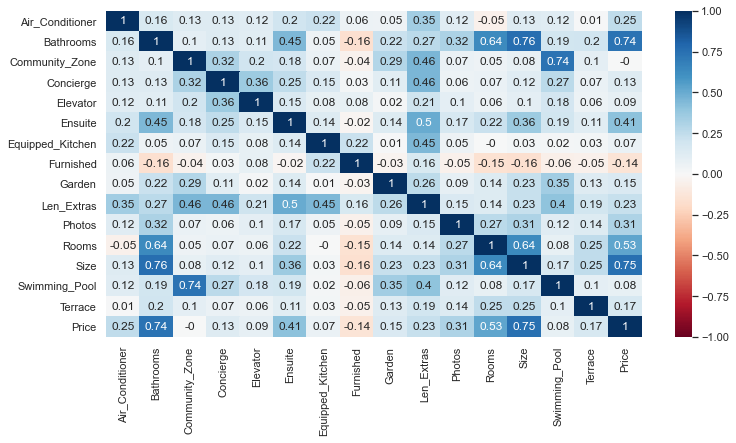

In [16]:
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(fotocasa_eda[num_cols].corr().round(2), vmin = -1, vmax = 1, cmap = "RdBu", 
            annot = True, ax = ax)

Logically, number of bathrooms and rooms and price are highly correlated with price:

(-1.0, 10.0)

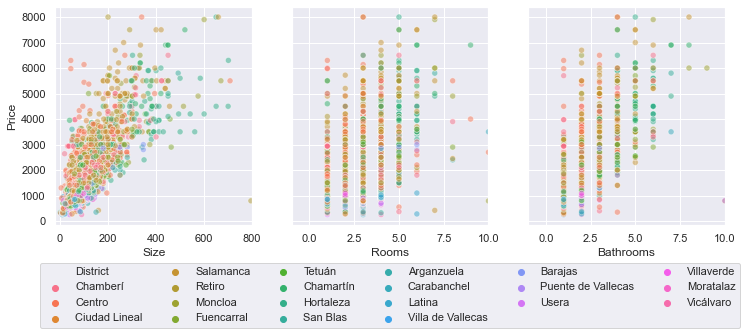

In [17]:
f, ax = plt.subplots(figsize = (12,4), ncols = 3, sharey = True)
sns.scatterplot(x = fotocasa_eda["Size"], y = fotocasa_eda["Price"], ax = ax[0], 
                hue = fotocasa_eda["District"], alpha = 0.5)
sns.scatterplot(x = fotocasa_eda["Rooms"], y = fotocasa_eda["Price"], ax = ax[1], 
                hue = fotocasa_eda["District"], alpha = 0.5)
sns.scatterplot(x = fotocasa_eda["Bathrooms"], y = fotocasa_eda["Price"], ax = ax[2], 
                hue = fotocasa_eda["District"], alpha = 0.5)
ax[0].get_legend().remove()
ax[0].set_xlim([-20,800])
ax[1].get_legend().remove()
ax[1].set_xlim([-1,10])
ax[2].legend(loc="lower center", bbox_to_anchor=(-0.7, -0.5), ncol = 6)
ax[2].set_xlim([-1,10])

# District and borough

In [18]:
district_map = gpd.read_file("District/DISTRITOS.shp")

In [19]:
district_map["NOMBRE"] = district_map["NOMBRE"].apply(lambda x: x.split(" - ")[0])

In [20]:
mean_district_values = pd.pivot_table(fotocasa_eda, values = "Price", index = "District")
count_district_values = fotocasa_eda.District.value_counts()
data_district = mean_district_values.join(count_district_values)

In [21]:
merged_district = district_map.set_index("NOMBRE").join(data_district).reset_index()

In [22]:
merged_district["coords"] = merged_district["geometry"].apply(lambda x: x.representative_point().coords[0])

Text(0.5, 1.0, 'Number of properties to rent')

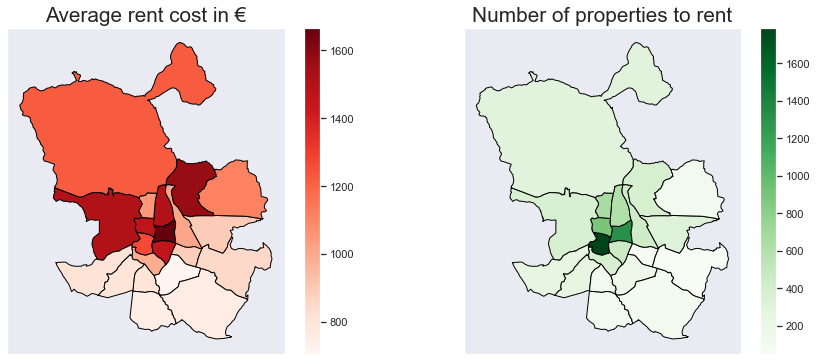

In [23]:
f, ax = plt.subplots(figsize = (15,6), ncols = 2)
merged_district.plot(ax = ax[0], column = "Price", cmap = "Reds", edgecolor = "black", legend = True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Average rent cost in €", fontsize = "xx-large")
merged_district.plot(ax = ax[1], column = "District", cmap = "Greens", edgecolor = "black", legend = True)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Number of properties to rent", fontsize = "xx-large")

In [24]:
borough_map = gpd.read_file("Boroughs/BARRIOS.shp")

In [25]:
borough_map["NOMBRE"] = borough_map["NOMBRE"].apply(lambda x: unidecode(x).split(",")[0].lower())

In [26]:
mean_borough_values = pd.pivot_table(fotocasa_eda, values = "Price", index = "Borough").reset_index()
mean_borough_values["Borough"] = mean_borough_values["Borough"] \
    .apply(lambda x: unidecode(x).split(",")[0].lower())
mean_borough_values = mean_borough_values.set_index("Borough")

In [27]:
count_borough_values = fotocasa_eda.Borough.value_counts().reset_index()
count_borough_values["index"] = count_borough_values["index"].apply(lambda x: unidecode(x).lower())
count_borough_values = count_borough_values.set_index("index")

In [28]:
data_borough = count_borough_values.join(mean_borough_values)

In [29]:
data_borough.loc["valderrivas"]

Borough      27.000000
Price      1210.481481
Name: valderrivas, dtype: float64

In [30]:
merged_borough = borough_map.set_index("NOMBRE").join(data_borough, how = "outer").reset_index()

In [31]:
merged_borough[merged_borough["Price"].isna()]

,index,OBJECTID,geodb_oid,CODDIS,NOMDIS,CODBAR,CODDISTRIT,CODBARRIO,ORIG_FID,geometry,Borough,Price
17,atocha,13,13,02,Arganzuela,027,02,2-7,12,"POLYGON ((441548.282 4473108.667, 441569.612 4...",NaN,NaN
119,valdebernardo,0,0,19,Vicálvaro,192,19,19-2,0,"POLYGON ((448517.740 4472307.209, 448505.626 4...",NaN,NaN


In Fotocasa, the borough of Valderrivas is included in the borough of Valdebernardo and the borough of Atocha in the borough of Delicias. Consider that when building the pipeline. 

In [32]:
merged_borough.loc[merged_borough["index"]=="valdebernardo","Borough"] = \
        data_borough.loc["valderrivas","Borough"]
merged_borough.loc[merged_borough["index"]=="valdebernardo","Price"] = \
        data_borough.loc["valderrivas","Price"]

In [33]:
merged_borough.loc[merged_borough["index"]=="atocha","Borough"] = \
        data_borough.loc["delicias","Borough"]
merged_borough.loc[merged_borough["index"]=="atocha","Price"] = \
        data_borough.loc["delicias","Price"]

Text(0.5, 1.0, 'Number of properties to rent')

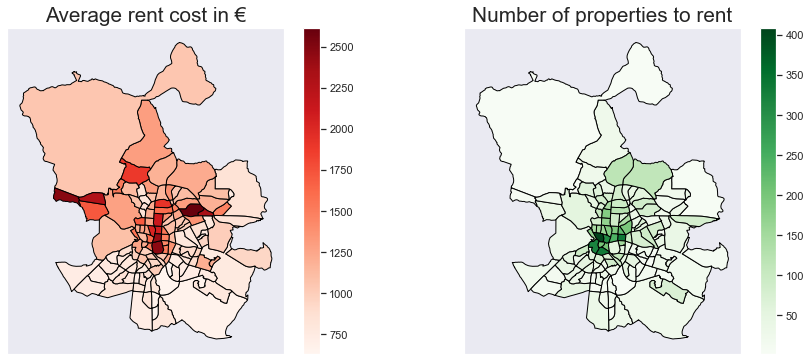

In [34]:
f, ax = plt.subplots(figsize = (15,6), ncols = 2)
merged_borough.plot(column = "Price", cmap = "Reds", edgecolor = "black", legend = True, ax = ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Average rent cost in €", fontsize = "xx-large")
merged_borough.plot(column = "Borough", cmap = "Greens", edgecolor = "black", legend = True, ax = ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Number of properties to rent", fontsize = "xx-large")

In [35]:
fotocasa_eda["Borough"].value_counts().min()

2

In [36]:
fotocasa_eda["District"].value_counts().min()

49

# Antiquity

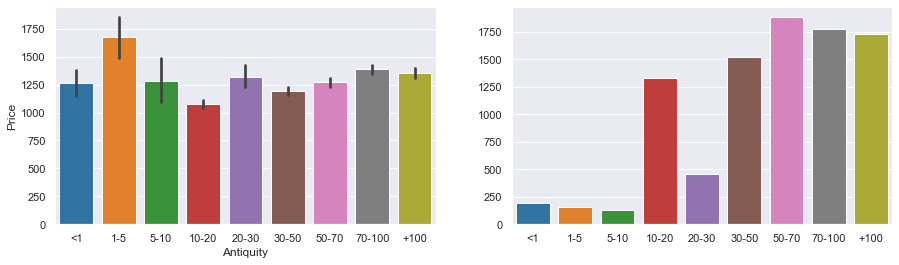

In [37]:
f, ax = plt.subplots(ncols = 2, figsize = (15,4))
sns.barplot(x = fotocasa_eda["Antiquity"], y = fotocasa_eda["Price"],
           order = ["<1","1-5","5-10","10-20","20-30","30-50","50-70","70-100","+100"], ax = ax[0])
sns.barplot(x = fotocasa_eda["Antiquity"].value_counts().index, 
            y = fotocasa_eda["Antiquity"].value_counts().values,
           order = ["<1","1-5","5-10","10-20","20-30","30-50","50-70","70-100","+100"], ax = ax[1])

# Energy consumption and Emissions

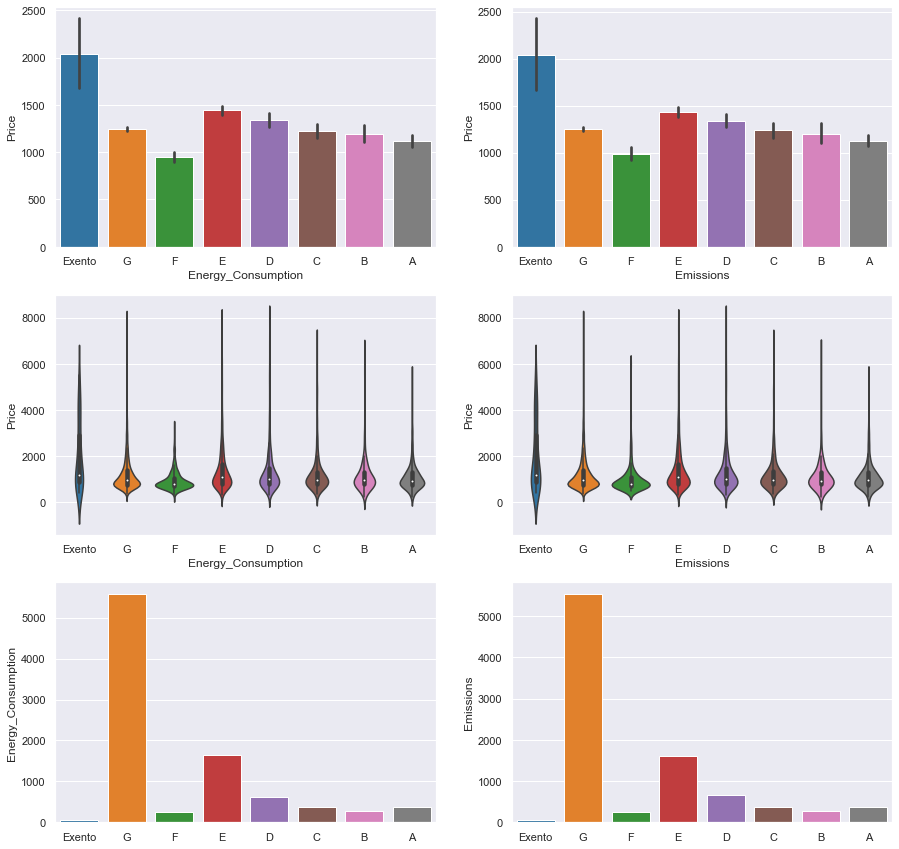

In [38]:
f, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
sns.barplot(x = fotocasa_eda["Energy_Consumption"], y = fotocasa_eda["Price"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[0][0])
sns.barplot(x = fotocasa_eda["Emissions"], y = fotocasa_eda["Price"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[0][1])
sns.violinplot(x = fotocasa_eda["Energy_Consumption"], y = fotocasa_eda["Price"],
            order = ["Exento","G", "F", "E", "D", "C","B", "A"], ax=ax[1][0])
sns.violinplot(x = fotocasa_eda["Emissions"], y = fotocasa_eda["Price"],
            order = ["Exento","G", "F", "E", "D", "C","B", "A"], ax=ax[1][1])
sns.barplot(x = fotocasa_eda["Energy_Consumption"].value_counts().index, 
            y = fotocasa_eda["Energy_Consumption"].value_counts().reset_index()["Energy_Consumption"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[2][0])
sns.barplot(x = fotocasa_eda["Emissions"].value_counts().index, 
            y = fotocasa_eda["Emissions"].value_counts().reset_index()["Emissions"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[2][1])

In [39]:
(fotocasa_eda["Emissions"]==fotocasa_eda["Energy_Consumption"]).sum()/len(fotocasa_eda)*100

94.3165703065343

More or less the same info. We just need one:

In [40]:
fotocasa_eda = fotocasa_eda.drop("Emissions", axis = 1)

# Floor

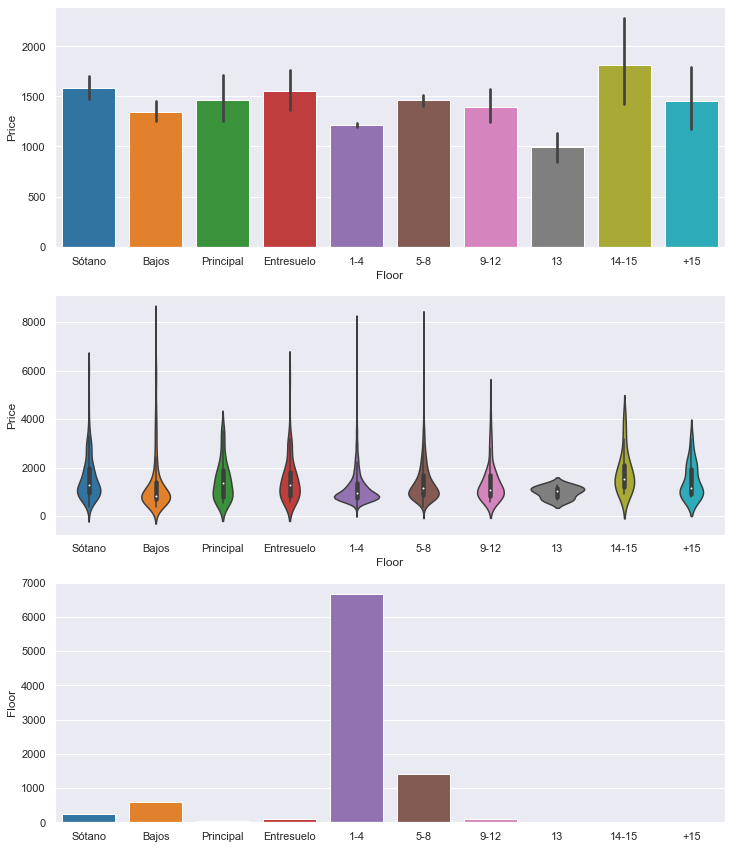

In [41]:
f, ax = plt.subplots(nrows=3, figsize=(12,15))
sns.barplot(x = fotocasa_eda["Floor"], y = fotocasa_eda["Price"], ax=ax[0], 
            order = ["Sótano","Bajos","Principal", "Entresuelo","1-4","5-8","9-12","13","14-15","+15"])
sns.violinplot(x = fotocasa_eda["Floor"], y = fotocasa_eda["Price"], ax=ax[1],
            order = ["Sótano","Bajos","Principal", "Entresuelo","1-4","5-8","9-12","13","14-15","+15"])
sns.barplot(x = fotocasa_eda["Floor"].value_counts().index, 
            y = fotocasa_eda["Floor"].value_counts().reset_index()["Floor"], ax=ax[2],
            order = ["Sótano","Bajos","Principal", "Entresuelo","1-4","5-8","9-12","13","14-15","+15"])

In [42]:
fotocasa_eda["Floor"].value_counts()

1-4           6669
5-8           1397
Bajos          582
Sótano         233
9-12           102
Entresuelo      90
Principal       50
+15             19
14-15           15
13              10
Name: Floor, dtype: int64

# Type

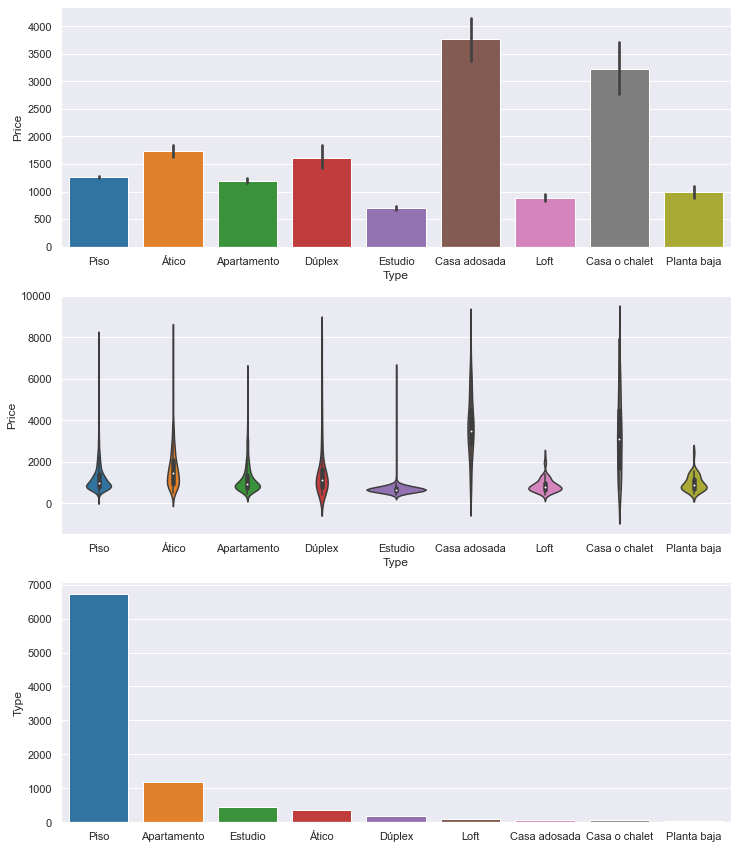

In [43]:
f, ax = plt.subplots(nrows=3, figsize=(12,15))
sns.barplot(x = fotocasa_eda["Type"], y = fotocasa_eda["Price"], ax=ax[0])
sns.violinplot(x = fotocasa_eda["Type"], y = fotocasa_eda["Price"], ax=ax[1])
sns.barplot(x = fotocasa_eda["Type"].value_counts().index, 
            y = fotocasa_eda["Type"].value_counts().reset_index()["Type"], ax=ax[2])

In [44]:
fotocasa_eda["Type"].value_counts()

Piso             6728
Apartamento      1192
Estudio           459
Ático             369
Dúplex            172
Loft               94
Casa adosada       59
Casa o chalet      52
Planta baja        42
Name: Type, dtype: int64

In [45]:
fotocasa_eda.to_csv("fotocasa_eda.csv", index=False)